In [13]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-poster')
%matplotlib inline

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [85]:
print(plt.rcParams.get('figure.figsize'))
print(plt.rcParams.get('axes.labelsize'))
print(plt.rcParams.get('axes.titlesize'))
print(plt.rcParams.get('legend.fontsize'))
print(plt.rcParams.get('xtick.labelsize'))
print(plt.rcParams.get('ytick.labelsize'))

[12.8, 8.8]
17.6
19.2
None
16.0
16.0
16.0


In [105]:
plt.rcParams.update({'axes.labelsize': 22,'axes.titlesize':32, 'legend.fontsize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

In [54]:
FIG_HEIGHT = 6

In [106]:
def compute_left_core_length(frequency_vector: np.array, threshold: float) -> int:
    current_sum = 0
    for i, freq in enumerate(frequency_vector):
        current_sum = current_sum + freq
        if np.isclose(current_sum, threshold) or current_sum > threshold:
            return i + 1


def compute_right_core_length(frequency_vector: np.array, threshold: float) -> int:
    current_sum = 0
    for i, freq in enumerate(frequency_vector[::-1]):
        current_sum = current_sum + freq
        if np.isclose(current_sum, threshold) or current_sum > threshold:
            return i + 1


def compute_middle_core_range(frequency_vector: np.array, threshold: float) -> tuple[int, int]:
    lower_threshold = (1. - threshold) / 2

    current_presum = 0
    start_index = -1
    for i, freq in enumerate(frequency_vector):
        current_presum += freq
        if current_presum > lower_threshold and not np.isclose(current_presum, lower_threshold):
            start_index = i
            break

    current_sum = 0
    for j, freq in enumerate(frequency_vector[start_index:]):
        current_sum += freq
        if np.isclose(current_sum, threshold) or current_sum > threshold:
            return start_index, j + 1

def compute_middle_core_length(frequency_vector: np.array, threshold: float) -> int:
    return compute_middle_core_range(frequency_vector, threshold)[1]


def compute_sorted_core_length(frequency_vector: np.array, threshold: float) -> int:
    freq_descending_order = np.sort(frequency_vector)[::-1]

    current_sum = 0
    for i, freq in enumerate(freq_descending_order):
        current_sum += freq
        if np.isclose(current_sum, threshold) or current_sum > threshold:
            return i + 1


def _compute_ephemerality_from_core(core_length: int, range_length: int, threshold: float) -> float:
    return max(0., 1 - (core_length / range_length) / threshold)

def plot_threshold(vector, step: int=0.05, title: str = "Vector"):
    fig, axs = plt.subplots(2, 2)

    ephemerality_vector = list()
    X = np.arange(step, 1, step)
    for threshold in X:
        ephemerality_vector.append(_compute_ephemerality_from_core(compute_left_core_length(vector, threshold), len(vector), threshold))
    axs[0, 0].plot(X, ephemerality_vector, '.-')
    axs[0, 0].set_xlabel("Threshold")
    axs[0, 0].set_ylabel("Ephemerality")
    axs[0, 0].set_title(rf"$\epsilon_l\left(\alpha\right)$ for {title.lower()}")
    axs[0, 0].set_ylim([0., 1.])

    ephemerality_vector = list()
    X = np.arange(step, 1, step)
    for threshold in X:
        ephemerality_vector.append(_compute_ephemerality_from_core(compute_right_core_length(vector, threshold), len(vector), threshold))
    axs[0, 1].plot(X, ephemerality_vector, '.-')
    axs[0, 1].set_xlabel("Threshold")
    axs[0, 1].set_ylabel("Ephemerality")
    axs[0, 1].set_title(rf"$\epsilon_r\left(\alpha\right) for {title.lower()}$")
    axs[0, 1].set_ylim([0., 1.])

    ephemerality_vector = list()
    X = np.arange(step, 1, step)
    for threshold in X:
        ephemerality_vector.append(_compute_ephemerality_from_core(compute_middle_core_length(vector, threshold), len(vector), threshold))
    axs[1, 0].plot(X, ephemerality_vector, '.-')
    axs[1, 0].set_xlabel("Threshold")
    axs[1, 0].set_ylabel("Ephemerality")
    axs[1, 0].set_title(rf"$\epsilon_m\left(\alpha\right) for {title.lower()}$")
    axs[1, 0].set_ylim([0., 1.])

    ephemerality_vector = list()
    X = np.arange(step, 1, step)
    for threshold in X:
        ephemerality_vector.append(_compute_ephemerality_from_core(compute_sorted_core_length(vector, threshold), len(vector), threshold))
    axs[1, 1].plot(X, ephemerality_vector, '.-')
    axs[1, 1].set_xlabel("Threshold")
    axs[1, 1].set_ylabel("Ephemerality")
    axs[1, 1].set_title(rf"$\epsilon_s\left(\alpha\right) for {title.lower()}$")
    axs[1, 1].set_ylim([0., 1.])

    fig.tight_layout()

In [127]:
def fill(ax, y, x_start, x_end, color):
    x = np.arange(0, len(y))
    ax.fill_between(x, y, -1., where=(x_start <= x) & (x < x_end), color=color)
    ax.fill_between(x, 1., y, where=(x_start <= x) & (x < x_end), hatch='//', facecolor='lightsalmon')

In [131]:
def plot_all(vector, ylim, title, threshold, save_path=""):
    title_size = plt.rcParams.get('axes.titlesize')
    plt.rcParams.update({'axes.titlesize': 44})
    plt.figure(figsize=[12.8, FIG_HEIGHT])
    plt.plot(vector, '.-', color='#912916')
    plt.ylim(ylim)
    plt.xlabel("Time")
    plt.ylabel("Normalized activity")
    plt.title(title, fontweight='bold')
    plt.tight_layout()
    if save_path:
        plt.savefig(f"{save_path}{title}.png", bbox_inches='tight')

    plt.rcParams.update({'axes.titlesize': title_size})

    left_core = compute_left_core_length(vector, threshold)
    right_core = compute_right_core_length(vector, threshold)
    middle_core = compute_middle_core_range(vector, threshold)
    sorted_core = compute_sorted_core_length(vector, threshold)

    ephemeralities = {
        "left_core": _compute_ephemerality_from_core(left_core, len(vector), threshold),
        "right_core": _compute_ephemerality_from_core(right_core, len(vector), threshold),
        "middle_core": _compute_ephemerality_from_core(middle_core[1], len(vector), threshold),
        "sorted_core": _compute_ephemerality_from_core(sorted_core, len(vector), threshold),
    }

    fig, axs = plt.subplots(2, 2)
    fig.set_figheight(FIG_HEIGHT + 1)
    axs[0, 0].plot(vector, '.-', color='#912916')
    fill(axs[0, 0], vector, 0, left_core, color='coral')
    axs[0, 0].set_ylim(ylim)
    axs[0, 0].set_xlabel("Time")
    axs[0, 0].set_ylabel("Activity")
    cur_title = rf"${int(threshold * 100)}\%$ left core" + "\n" + rf"Ephemerality: $\epsilon={np.round(ephemeralities['left_core'], 2)}$"
    axs[0, 0].set_title(cur_title)

    axs[0, 1].plot(vector, '.-', color='#912916')
    fill(axs[0, 1], vector, len(vector) - right_core, len(vector), color='coral')
    axs[0, 1].set_ylim(ylim)
    axs[0, 1].set_xlabel("Time")
    cur_title = rf"${int(threshold * 100)}\%$ right core" + "\n" + rf"Ephemerality: $\epsilon={np.round(ephemeralities['right_core'], 2)}$"
    axs[0, 1].set_title(cur_title)

    axs[1, 0].plot(vector, '.-', color='#912916')
    fill(axs[1, 0], vector, middle_core[0], middle_core[0] + middle_core[1], color='coral')
    axs[1, 0].set_ylim(ylim)
    axs[1, 0].set_xlabel("Time")
    axs[1, 0].set_ylabel("Activity")
    cur_title = rf"${int(threshold * 100)}\%$ middle core" + "\n" + rf"Ephemerality: $\epsilon={np.round(ephemeralities['middle_core'], 2)}$"
    axs[1, 0].set_title(cur_title)

    sorted_vector = np.sort(vector)[::-1]
    axs[1, 1].plot(sorted_vector, '.-', color='#912916')
    fill(axs[1, 1], sorted_vector, 0, sorted_core, color='coral')
    axs[1, 1].set_ylim(ylim)
    axs[1, 1].set_xlabel("Sorted activity vector")
    cur_title = rf"${int(threshold * 100)}\%$ sorted core" + "\n" + rf"Ephemerality: $\epsilon={np.round(ephemeralities['sorted_core'], 2)}$"
    axs[1, 1].set_title(cur_title)

    fig.tight_layout()

    if save_path:
        plt.savefig(f"{save_path}{title} with cores.png")

    return ephemeralities

In [5]:
one_peak_vector = np.array([1,2,7,5,2,4,5,3,10,5,6,45,98,287,261,150,29,11,2,8,5,3,3,5,6,2], dtype=float)
one_peak_vector /= np.sum(one_peak_vector)
# print(len(one_peak_vector))
# plt.plot(one_peak_vector, '.-', color='#912916')
# plt.ylim([0,0.31])

{'left_core': 0.3162393162393162,
 'right_core': 0.4017094017094017,
 'middle_core': 0.7008547008547008,
 'sorted_core': 0.7435897435897436}

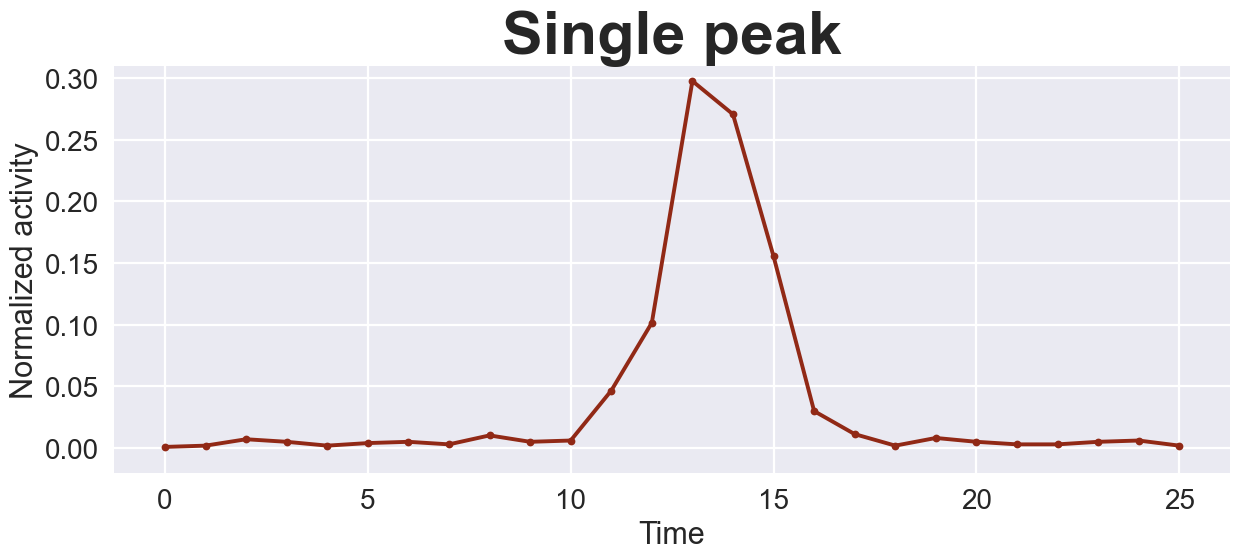

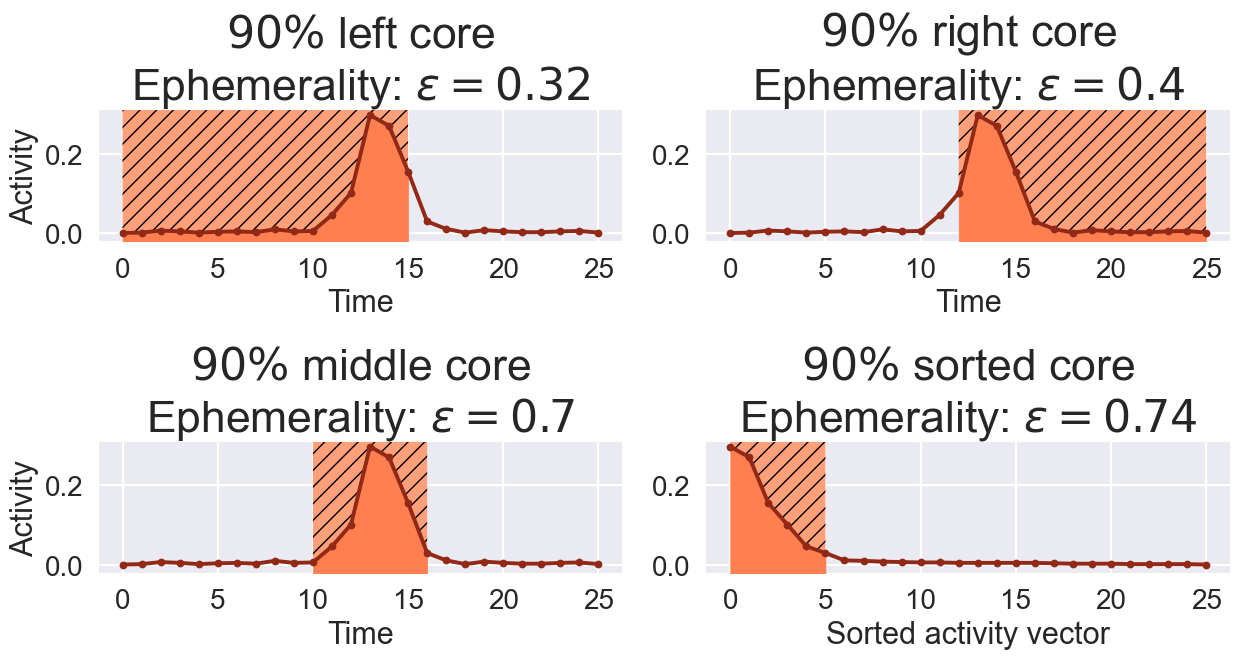

In [132]:
plot_all(one_peak_vector, [-0.02,0.31], "Single peak", 0.9, save_path="D:\\Dropbox\\BSC\\AI4Media\\Plenary 2023\\")

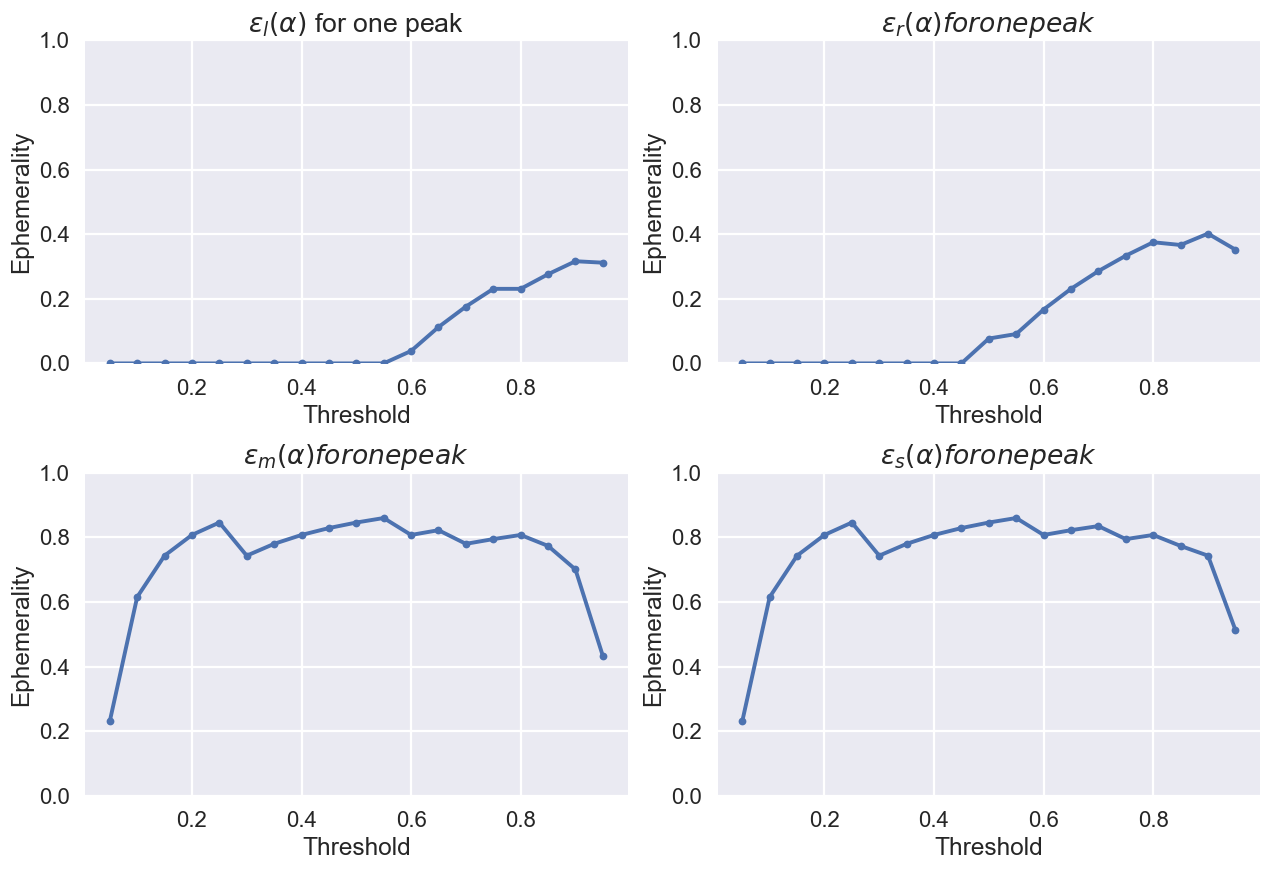

In [41]:
plot_threshold(one_peak_vector, title="One peak")

In [24]:
two_peaks_vector = np.array([8,1,5,35,160,162,45,12,9,4,6,6,3,7,5,2,3,2,57,120,222,78,23,1,9,4], dtype=float)
two_peaks_vector /= np.sum(two_peaks_vector)
# print(len(two_peaks_vector))
# plt.plot(two_peaks_vector, '.-', color='#912916')
# plt.ylim([0,0.31])

{'left_core': 0.05982905982905984,
 'right_core': 0.05982905982905984,
 'middle_core': 0.23076923076923084,
 'sorted_core': 0.6153846153846154}

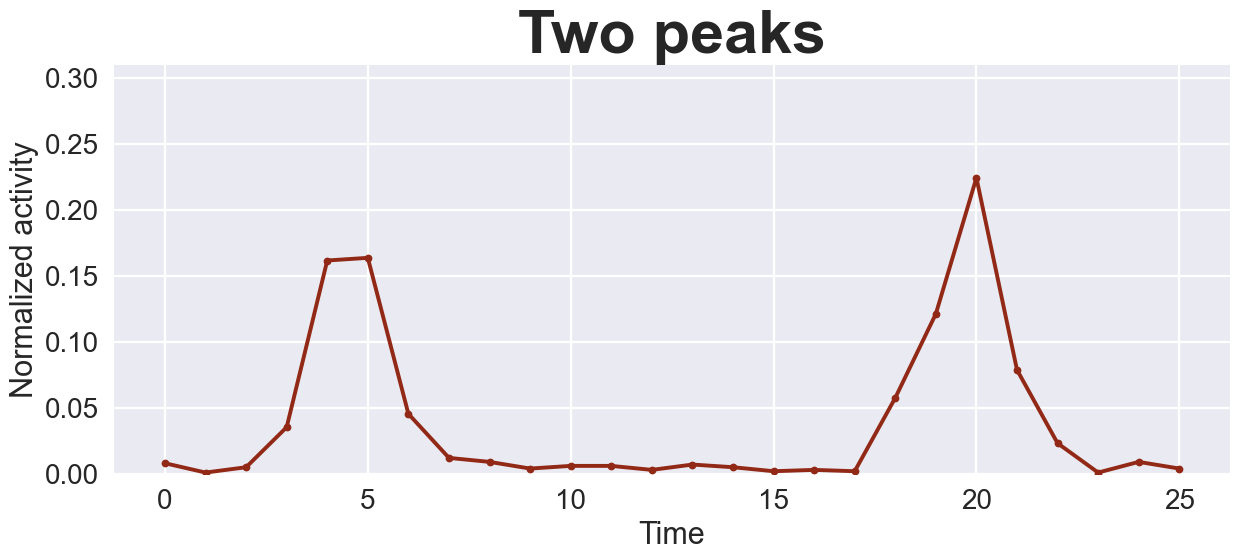

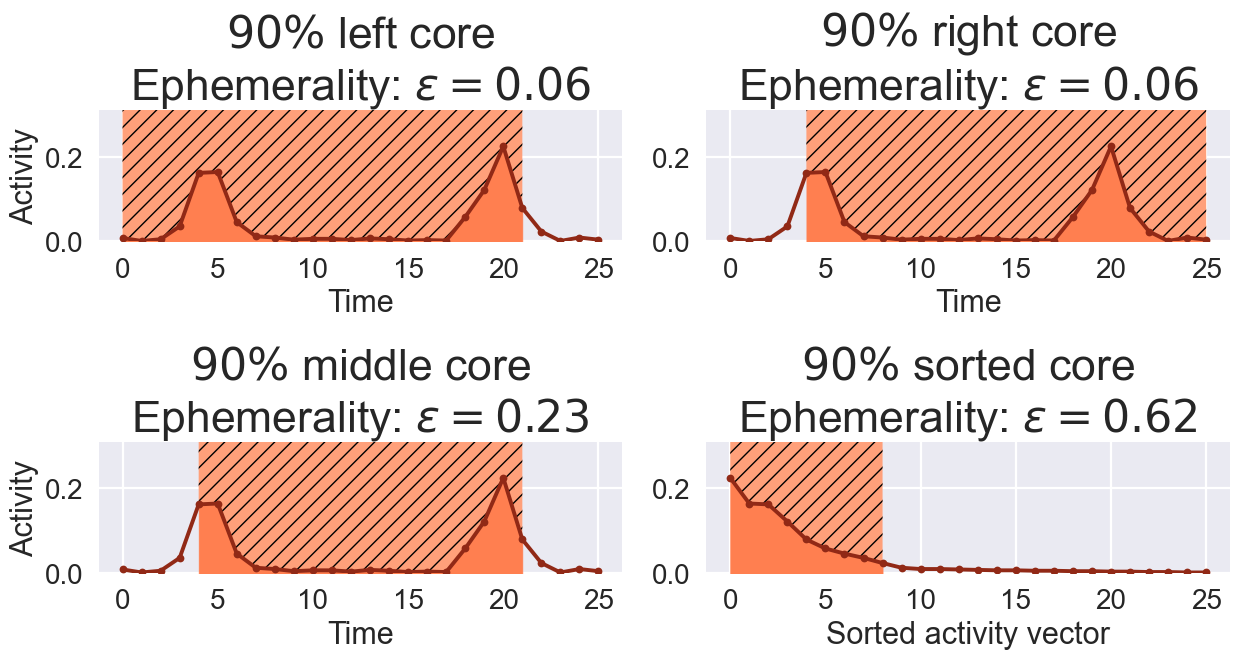

In [133]:
plot_all(two_peaks_vector, [0,0.31], "Two peaks", 0.9, save_path="D:\\Dropbox\\BSC\\AI4Media\\Plenary 2023\\")

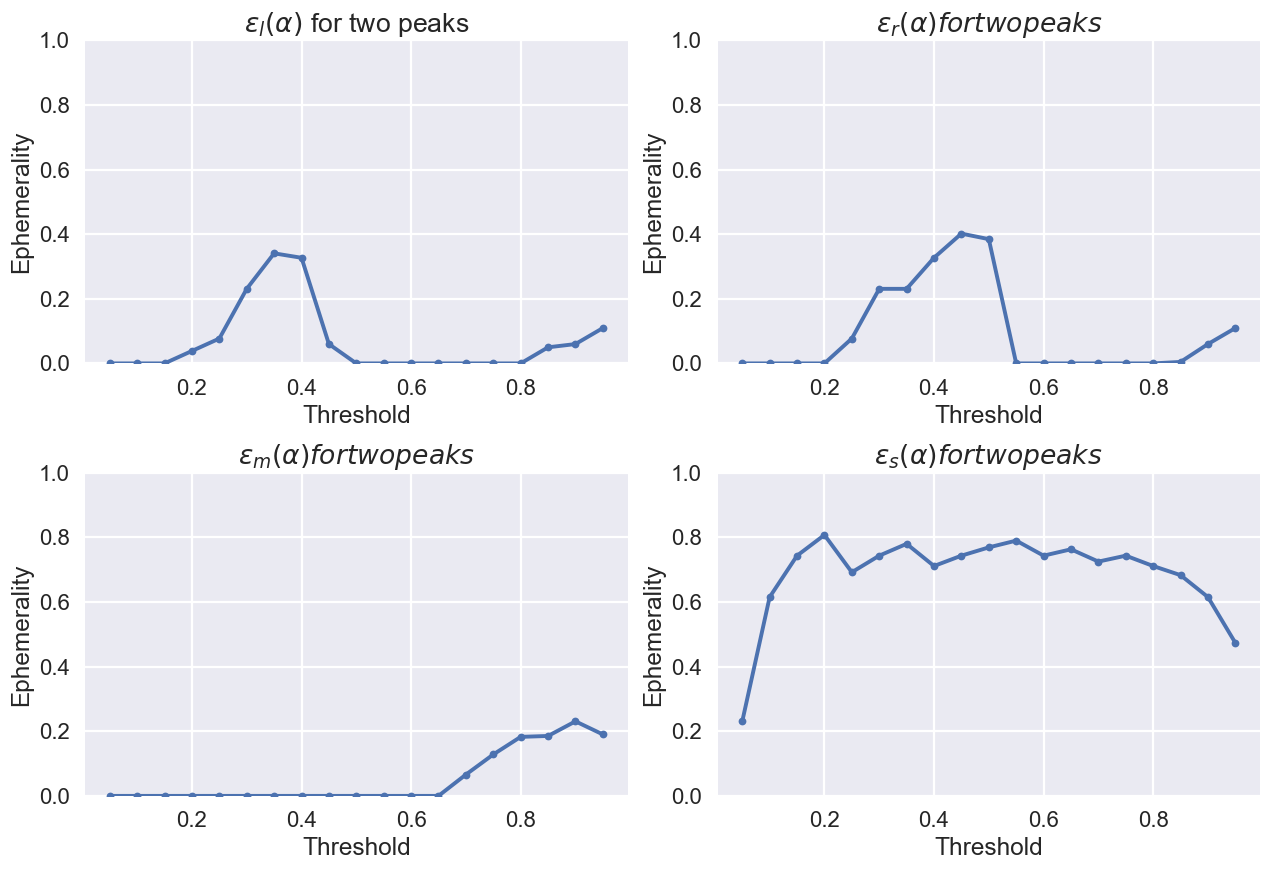

In [42]:
plot_threshold(two_peaks_vector, title="Two peaks")

In [27]:
np.random.seed(1101)
uni = np.random.uniform(2, 8, (26,))

In [28]:
uniform = uni.copy()
uniform[20] = 11.
uniform /= np.sum(uniform)
# print(len(uniform))
# plt.plot(uniform, '.-', color='#912916')
# plt.ylim([0,0.31])

{'left_core': 0.0,
 'right_core': 0.0,
 'middle_core': 0.0,
 'sorted_core': 0.1826923076923077}

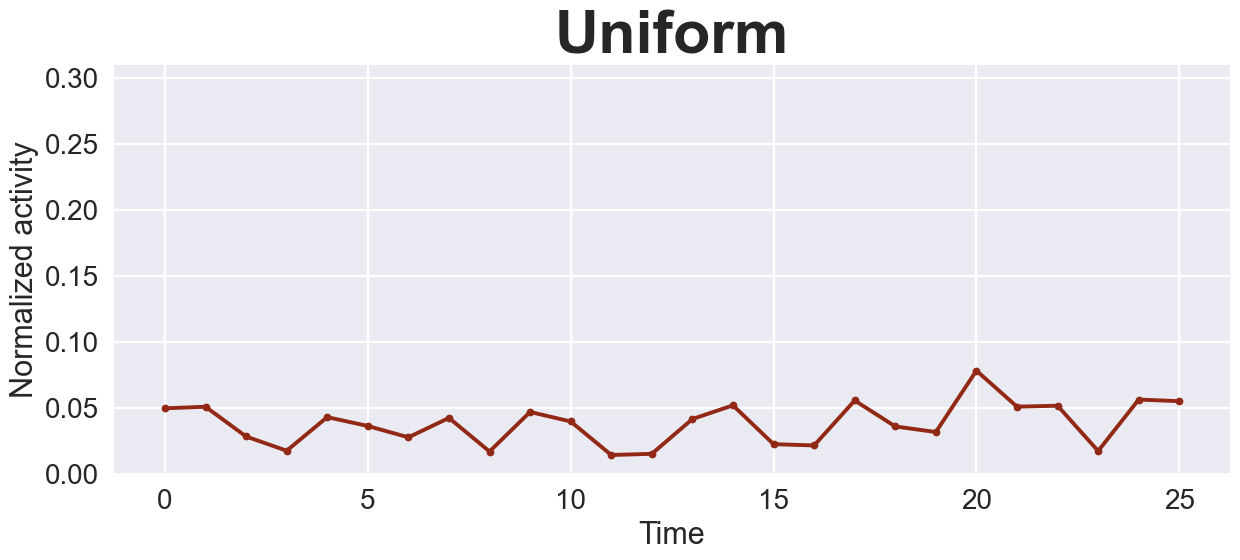

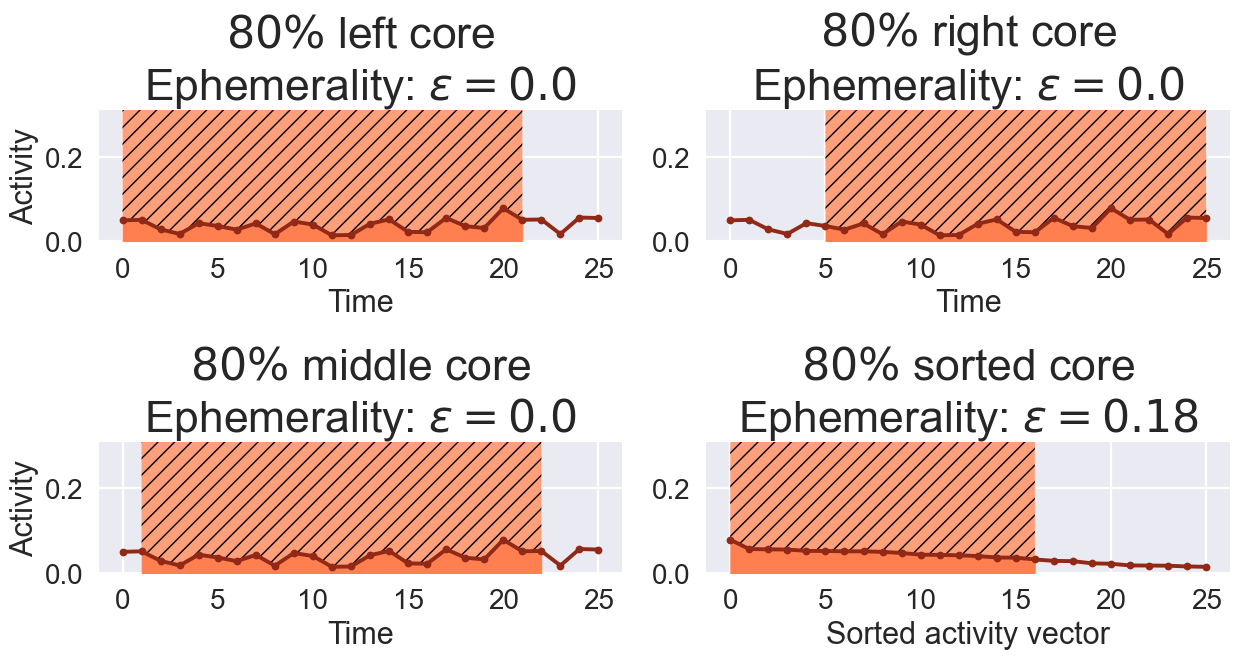

In [134]:
plot_all(uniform, [0,0.31], "Uniform", 0.8, save_path="D:\\Dropbox\\BSC\\AI4Media\\Plenary 2023\\")

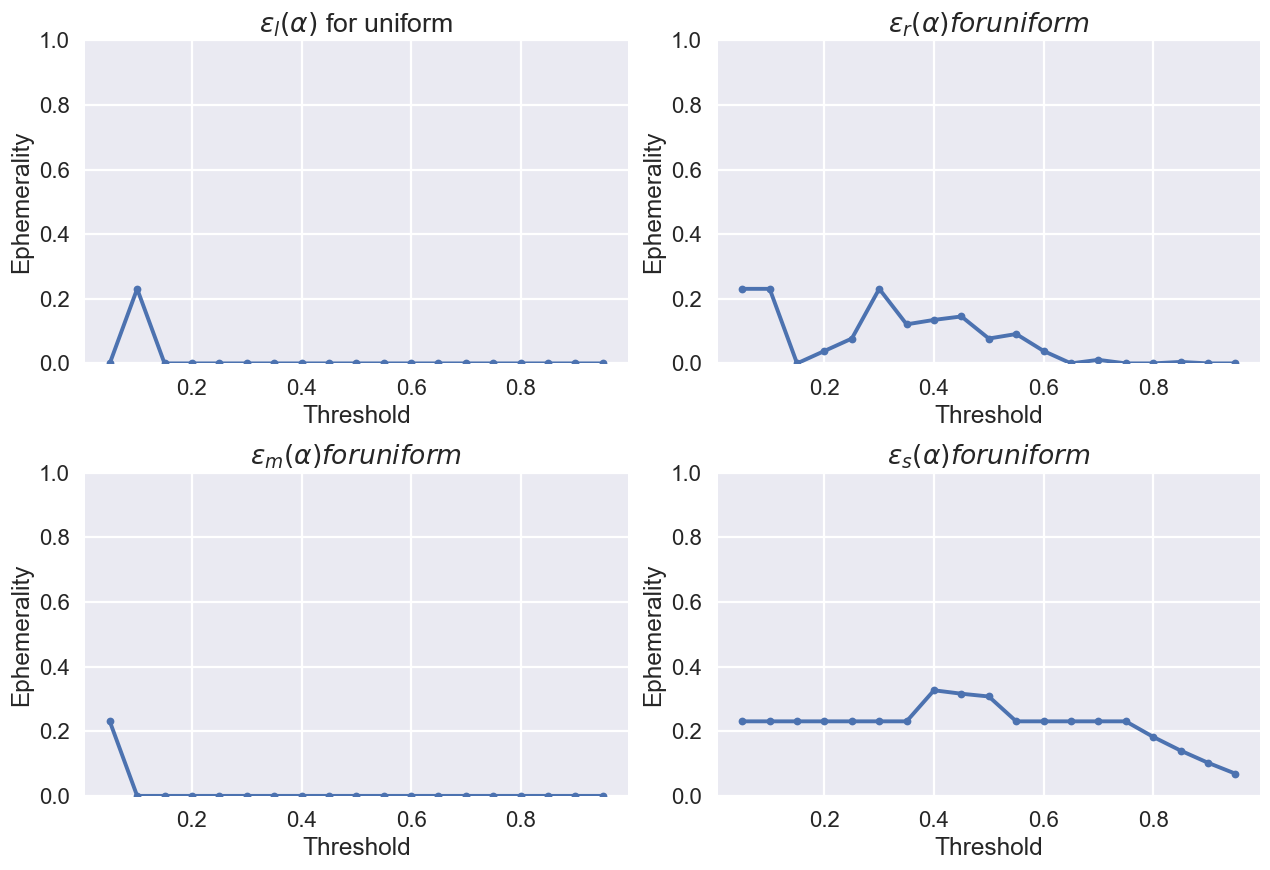

In [43]:
plot_threshold(uniform, title="Uniform")